In [30]:
from textblob import TextBlob
from textblob.taggers import NLTKTagger
nltk_tagger = NLTKTagger()
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import Counter

In [3]:
df = pd.read_csv("/Users/BaileyDanielson/Documents/Python/NLP_Practice/final_df.csv")
df.head()

,Sentence,Section,Book_Title,Author,Index,Polarity,Subjectivity,Word_Count
0,Coetzee In the Heart of the Country.,0,In the Heart of the Country,J.M. Coetzee,0,0.000000,0.000000,7
1,Today my father brought home his new bride.,1,In the Heart of the Country,J.M. Coetzee,1,0.136364,0.454545,8
2,They came clip-clop across the flats in a dog...,1,In the Heart of the Country,J.M. Coetzee,2,-0.225000,0.500000,25
3,Or perhaps they were drawn by two plumed donk...,1,In the Heart of the Country,J.M. Coetzee,3,0.000000,1.000000,13
4,My father wore his black swallowtail coat and...,1,In the Heart of the Country,J.M. Coetzee,4,-0.115079,0.239683,24


In [6]:
IHC_df = df[df["Book_Title"] == "In the Heart of the Country"]["Sentence"]
IHC_df.tail()

3516         I will never live it down, nor do I want to.
3517    I am  corrupted to the bone with the beauty of...
3518    If the truth be  told, I never wanted to fly a...
3519    My hope was always that  they would descend an...
3520    I have never felt myself to be  another man's ...
Name: Sentence, dtype: object

In [8]:
IHC_sent = " ".join(list(IHC_df))

In [9]:
IHC_sent[:300]

'Coetzee  In the Heart of the Country. Today my father brought home his new bride. They came clip-clop across  the flats in a dog-cart drawn by a horse with an ostrich-plume waving on its  forehead, dusty after the long haul. Or perhaps they were drawn by two  plumed donkeys, that is also possible. M'

In [11]:
tagged_IHC = TextBlob(IHC_sent, pos_tagger=nltk_tagger)
tagged_IHC.pos_tags

[('Coetzee', 'NNP'),
 ('In', 'IN'),
 ('the', 'DT'),
 ('Heart', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Country', 'NNP'),
 ('Today', 'NN'),
 ('my', 'PRP$'),
 ('father', 'NN'),
 ('brought', 'VBD'),
 ('home', 'RB'),
 ('his', 'PRP$'),
 ('new', 'JJ'),
 ('bride', 'NN'),
 ('They', 'PRP'),
 ('came', 'VBD'),
 ('clip-clop', 'JJ'),
 ('across', 'IN'),
 ('the', 'DT'),
 ('flats', 'NNS'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('dog-cart', 'JJ'),
 ('drawn', 'NN'),
 ('by', 'IN'),
 ('a', 'DT'),
 ('horse', 'NN'),
 ('with', 'IN'),
 ('an', 'DT'),
 ('ostrich-plume', 'JJ'),
 ('waving', 'NN'),
 ('on', 'IN'),
 ('its', 'PRP$'),
 ('forehead', 'NN'),
 ('dusty', 'NN'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('long', 'JJ'),
 ('haul', 'NN'),
 ('Or', 'CC'),
 ('perhaps', 'RB'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('drawn', 'VBN'),
 ('by', 'IN'),
 ('two', 'CD'),
 ('plumed', 'JJ'),
 ('donkeys', 'NNS'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('also', 'RB'),
 ('possible', 'JJ'),
 ('My', 'PRP$'),
 ('father', 'NN'),
 ('wore', 'VBD'),
 ('

In [12]:
IHC_tags = [y for (x, y) in tagged_IHC.pos_tags]

In [16]:
IHC_tags[:12]

['NNP', 'IN', 'DT', 'NNP', 'IN', 'DT', 'NNP', 'NN', 'PRP$', 'NN', 'VBD', 'RB']

(array([22339.,  6133., 11334.,  3734.,  3268.,  7999.,   648.,   876.,
          414.,   149.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

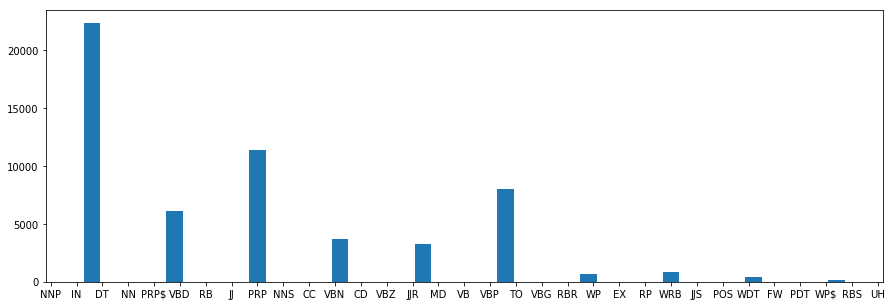

In [37]:
plt.figure(figsize = (15,5))
plt.hist(IHC_tags, rwidth = .2)

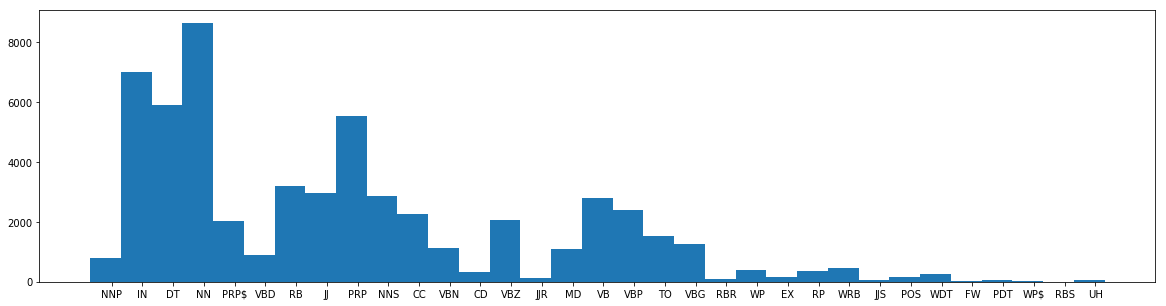

In [43]:
labels , values = zip(*Counter(IHC_tags).items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize = (20,5))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.2, labels)
plt.show()